In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\apollo\Downloads\cars data\car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df_final = df.drop('Car_Name',axis="columns")           #or axis = 1

In [6]:
df_final

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
df_final["no_year"] = 2021 - df_final["Year"]

In [8]:
df_final.drop("Year",axis=1,inplace=True)

In [9]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
df_final["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [11]:
df_final['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
df_final['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
df_final = pd.get_dummies(df_final, drop_first=True)
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [14]:
df_final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

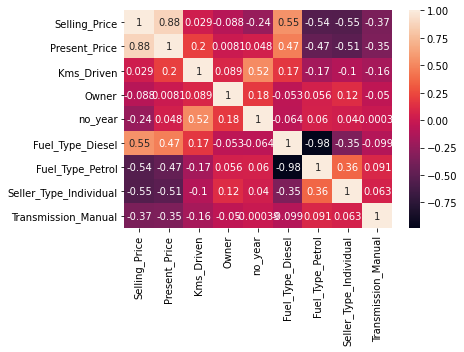

In [15]:
import seaborn as sns

corr = df_final.corr()

sns.heatmap(corr, annot=True)

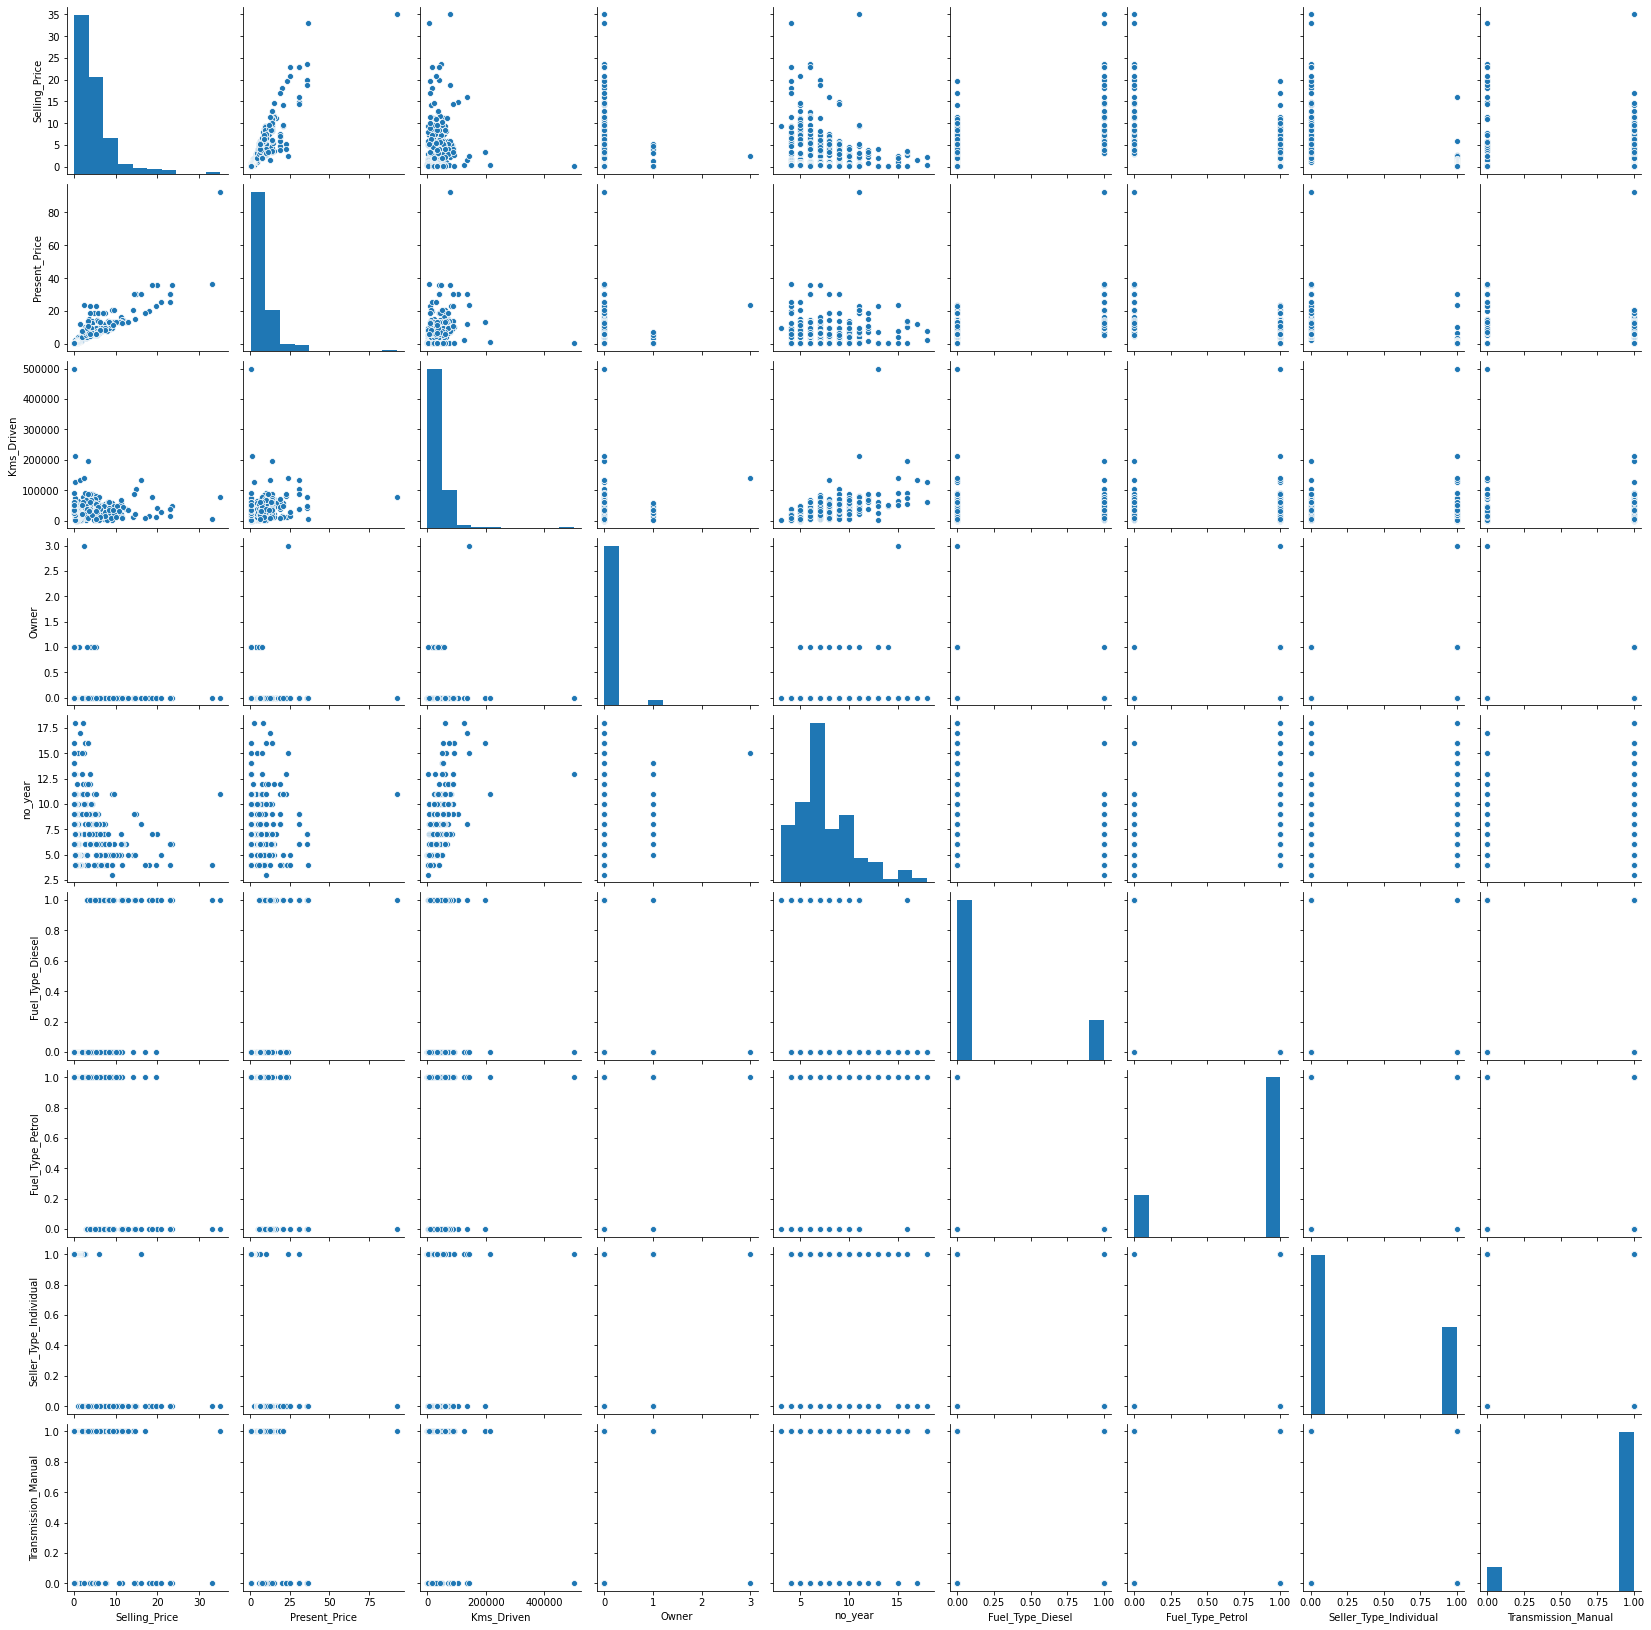

In [16]:
sns.pairplot(df_final)

In [17]:
Y = df_final.iloc[:,0]
X = df_final.iloc[:,1:]      # or X = df_final.drop("Selling_Price", axis=1)

In [18]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [19]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
import sklearn 
from sklearn.model_selection import train_test_split as tts

X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.25,random_state=5)

In [21]:
df_final.to_csv('df_final_car.csv')

Feature Importance

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,Y_train)
print(model.feature_importances_)

[4.15913109e-01 3.28866685e-02 1.15503288e-04 7.95574479e-02
 2.16008867e-01 1.97617394e-02 1.24140346e-01 1.11616318e-01]


In [23]:
feat_imp = pd.Series(model.feature_importances_, index = X.columns)

<AxesSubplot:>

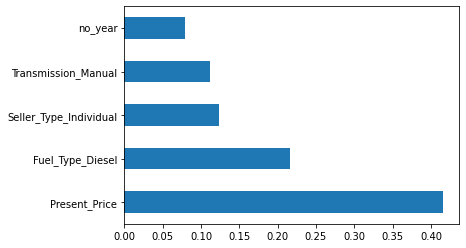

In [24]:
feat_imp.nlargest(5).plot(kind='barh')

Now this is a Regression Problem

lets try different models and pick the best one

1.Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [26]:
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [27]:
Y_pred = rf.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse , r2_score as r2
print("MAE:",mae(Y_test,Y_pred))
print("MSE:",mse(Y_test,Y_pred))
print("RMSE:",np.sqrt(mse(Y_test,Y_pred)))
print("R2:",r2(Y_test,Y_pred))

MAE: 0.4971250000000005
MSE: 0.6062432590789479
RMSE: 0.7786162463492191
R2: 0.9742938586471129


We want R2 to be maximum and others to be minimum for best results

2.Linear Regression

we need to create a Dictinory of different features to be used in CV functions

import model

initialise model

Hyperparameter Tuning

1.GridSearchCV

GridSearchCV(model,parameters,CV=5)    CV=Cross Validation

will use all combinations, and can be slow so we use

2.RandomizedSearchCV

it takes some random combinations


model_random=RandomizedSearchCV(estimator = model, param_distribution = parameter dict, scoring = 'neg_mean_square_error', n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=1)

model_random.fit(X_train,Y_train)




but first we need to create a Dictinory of different features to be used in abouve functions

model_random.fit

            .predict
    
            .mse .mae. rmse .r2

SAVINNG THE MODEL

file = open('car_price_pridiction_model.pkl','wb')

pickle.dump(model_random, file)

In [30]:
import pickle
file = open('car_price_pridiction_model.pkl','wb')

pickle.dump(rf, file)